In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('D:\\Project - Analyzing Amazon Sales Data\\Amazon_Sales_data.csv')

In [3]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [4]:
df.columns = [col.lower().replace(' ', '_') for col in df.columns]
df.head(2)

,region,country,item_type,sales_channel,order_priority,order_date,order_id,ship_date,units_sold,unit_price,unit_cost,total_revenue,total_cost,total_profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.0,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.8,328376.44,248406.36


In [5]:
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

Rows: 100
Columns: 14


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   region          100 non-null    object 
 1   country         100 non-null    object 
 2   item_type       100 non-null    object 
 3   sales_channel   100 non-null    object 
 4   order_priority  100 non-null    object 
 5   order_date      100 non-null    object 
 6   order_id        100 non-null    int64  
 7   ship_date       100 non-null    object 
 8   units_sold      100 non-null    int64  
 9   unit_price      100 non-null    float64
 10  unit_cost       100 non-null    float64
 11  total_revenue   100 non-null    float64
 12  total_cost      100 non-null    float64
 13  total_profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [7]:
df.isnull().sum()

region            0
country           0
item_type         0
sales_channel     0
order_priority    0
order_date        0
order_id          0
ship_date         0
units_sold        0
unit_price        0
unit_cost         0
total_revenue     0
total_cost        0
total_profit      0
dtype: int64

In [8]:
print('Number of unique values per column')
df.nunique()

Number of unique values per column


region              7
country            76
item_type          12
sales_channel       2
order_priority      4
order_date        100
order_id          100
ship_date          99
units_sold         99
unit_price         12
unit_cost          12
total_revenue     100
total_cost        100
total_profit      100
dtype: int64

In [9]:
dpl = df[df.duplicated()]
print(f"Number of duplicate rows: {dpl.shape[0]}")

Number of duplicate rows: 0


In [10]:
df.describe()

,order_id,units_sold,unit_price,unit_cost,total_revenue,total_cost,total_profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [11]:
df['order_date'] = pd.to_datetime(df['order_date'], format='%m/%d/%Y')
df['ship_date'] = pd.to_datetime(df['ship_date'], format='%m/%d/%Y')

In [12]:
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month

In [13]:
df['year_month_number'] = df['order_date'].dt.strftime('%Y-%m')
df['year_month_number'].head()

0    2010-05
1    2012-08
2    2014-05
3    2014-06
4    2013-02
Name: year_month_number, dtype: object

In [14]:
df.head()

,region,country,item_type,sales_channel,order_priority,order_date,order_id,ship_date,units_sold,unit_price,unit_cost,total_revenue,total_cost,total_profit,year,month,year_month_number
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5,2010-05
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8,2012-08
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5,2014-05
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6,2014-06
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2,2013-02


In [15]:
# Export the transformed data to CSV
export_file_path = 'D:\\Project - Analyzing Amazon Sales Data\\Transformed_Amazon_Sales_data.csv'
df.to_csv(export_file_path, index=False)

**Exploratory Data Analysis (EDA)**

In [16]:
yearly_sales_profit = df.groupby('year')[['total_revenue', 'total_profit']].sum().reset_index()

# Display the result
yearly_sales_profit

,year,total_revenue,total_profit
0,2010,19186024.92,6629567.43
1,2011,11129166.07,2741008.23
2,2012,31898644.52,9213010.12
3,2013,20330448.66,6715420.04
4,2014,16630214.43,5879461.68
5,2015,12427982.86,3996539.44
6,2016,12372867.22,4903838.01
7,2017,13373419.63,4089353.45


In [17]:
total_sales = df['total_revenue'].sum()
print('Total Sales:', total_sales)

Total Sales: 137348768.31


In [18]:
item_price_cost = df.groupby('item_type')[['unit_price', 'unit_cost']].mean().reset_index()
print('Average Sale and Cost by Items')
item_price_cost

Average Sale and Cost by Items


,item_type,unit_price,unit_cost
0,Baby Food,255.28,159.42
1,Beverages,47.45,31.79
2,Cereal,205.70,117.11
3,Clothes,109.28,35.84
4,Cosmetics,437.20,263.33
5,Fruits,9.33,6.92
6,Household,668.27,502.54
7,Meat,421.89,364.69
8,Office Supplies,651.21,524.96
9,Personal Care,81.73,56.67


In [19]:
# Group by the combined 'region_country' column and sum the 'total_revenue', then sort and get the top 5
top_countries_sales = df.groupby('country')['total_revenue'].sum().nlargest(5)
top_countries_sales

country
Honduras        6336545.48
Myanmar         6161257.90
Djibouti        6052890.86
Turkmenistan    5822036.20
Mexico          5643356.55
Name: total_revenue, dtype: float64

In [20]:
# Group by 'Item Type' and sum the 'Units Sold'
units_sold_by_item = df.groupby('item_type')['units_sold'].sum()
print(f'Unit Sold by Item Type:\n{units_sold_by_item}')

Unit Sold by Item Type:
item_type
Baby Food          40545
Beverages          56708
Cereal             25877
Clothes            71260
Cosmetics          83718
Fruits             49998
Household          44727
Meat               10675
Office Supplies    46967
Personal Care      48708
Snacks             13637
Vegetables         20051
Name: units_sold, dtype: int64


In [21]:
# Sales Trend: Year-wise
yearly_sales = df.groupby('year')['total_revenue'].sum().reset_index()

# ANSI escape code for bold text
bold = '\033[1m'
reset = '\033[0m'

print(f'{bold}Sales Trend Year Wise:{reset}\n{yearly_sales}')

Sales Trend Year Wise:
   year  total_revenue
0  2010    19186024.92
1  2011    11129166.07
2  2012    31898644.52
3  2013    20330448.66
4  2014    16630214.43
5  2015    12427982.86
6  2016    12372867.22
7  2017    13373419.63


In [25]:
year_month_sales = df.groupby(['year', 'month'])['total_revenue'].sum().unstack().fillna(0)

bold = '\033[1m'
reset = '\033[0m'

print(f'{bold}Sales Trend Yearly Month-Wise:{reset}\n{year_month_sales}')

Sales Trend Yearly Month-Wise:
month          1           2          3           4           5           6   \
year                                                                           
2010         0.00  3410661.12       0.00        0.00  2587973.26  1082418.40   
2011   1042225.35   387002.20       0.00  2798046.49   272410.45    19103.44   
2012   1012884.00  6707849.42  994765.42  4556012.38  3782781.82  2132075.27   
2013         0.00  3296425.02  835759.10  3262562.10        0.00  1352867.40   
2014         0.00  1819660.25       0.00  4510578.10  3060338.59    75591.66   
2015   5513227.50  2003911.12       0.00  1059987.26        0.00        0.00   
2016         0.00        0.00  197883.40        0.00   414371.10   568269.60   
2017   2914130.27  7115008.64  246415.95        0.00  3097864.77        0.00   

month          7          8           9           10          11          12  
year                                                                          
2010      

In [28]:
total_profit_margin = (df['total_profit'].sum() / df['total_revenue'].sum()) * 100
print(f'Total Profit Margin: {total_profit_margin:.2f}%')

Total Profit Margin: 32.16%


In [20]:
# Group by year and sum total profit
total_profit_by_year = df.groupby(df['order_date'].dt.year)['total_profit'].sum()

# Group by year and month, sum total profit for profit MTD (Month-to-Date)
profit_mtd_by_year = df.groupby([df['order_date'].dt.year, df['order_date'].dt.month])['total_profit'].sum()

print(f'Total Profit by Year:\n{total_profit_by_year}')

print(f'\nProfit MTD by Year and Month:\n{profit_mtd_by_year}')

Total Profit by Year:
order_date
2010    6629567.43
2011    2741008.23
2012    9213010.12
2013    6715420.04
2014    5879461.68
2015    3996539.44
2016    4903838.01
2017    4089353.45
Name: total_profit, dtype: float64

Profit MTD by Year and Month:
order_date  order_date
2010        2             1424410.94
            5              965441.52
            6              727423.20
            10            1495392.79
            11            1375311.70
            12             641587.28
2011        1              363509.04
            2              127722.96
            4              693911.51
            5               89904.06
            6                7828.12
            7               65214.72
            9              235601.16
            11            1157316.66
2012        1              206568.36
            2             1553766.98
            3              407630.41
            4              971008.14
            5             1218518.14
            6          

In [30]:
# total_profit_by_channel = df.groupby('sales_channel')['total_profit'].sum()
# print(f'Total Profit by Sales Channel:\n{total_profit_by_channel}') code need as per year

Total Profit by Sales Channel:
sales_channel
Offline    24920726.67
Online     19247471.73
Name: total_profit, dtype: float64


In [31]:
# top_5_items_profit = df.groupby('item_type')['total_profit'].sum().nlargest(5)
# print(f'Profit by Top 5 Items:\n{top_5_items_profit}') code need as per year

Profit by Top 5 Items:
item_type
Cosmetics          14556048.66
Household           7412605.71
Office Supplies     5929583.75
Clothes             5233334.40
Baby Food           3886643.70
Name: total_profit, dtype: float64


In [33]:
# # Group by 'Country' and sum the 'Total Profit'
# profit_by_country = df.groupby('country')['total_profit'].sum()
# print('Profit by Country:')
# print(profit_by_country) code need as per year

Profit by Country:
country
Albania            166635.36
Angola             693911.51
Australia          576605.12
Austria            495007.89
Azerbaijan        1512926.83
                     ...    
The Gambia        1385883.27
Turkmenistan      1267258.40
Tuvalu             951410.50
United Kingdom      46735.86
Zambia             225246.90
Name: total_profit, Length: 76, dtype: float64


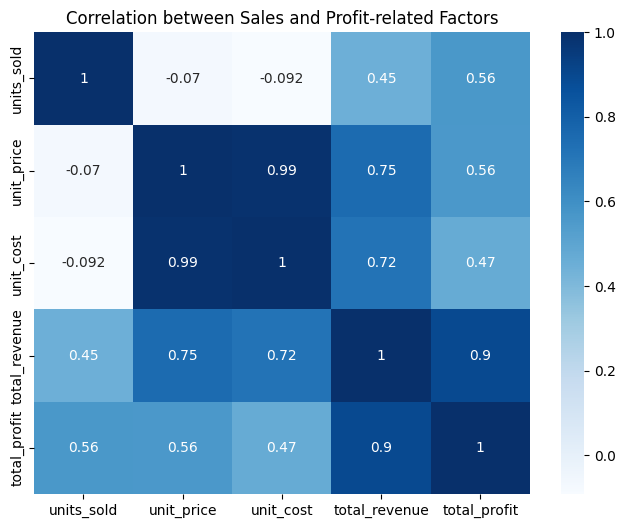

In [32]:
# Create a correlation matrix
corr_matrix = df[['units_sold', 'unit_price', 'unit_cost', 'total_revenue', 'total_profit']].corr()

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation between Sales and Profit-related Factors')
plt.show()